In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import analysis_util
import plotly.express as px
import networkx as nx
import pickle
import os
from tqdm import tqdm
sns.set_theme()
from scipy.stats import pearsonr
import datetime

In [2]:
# df_10 = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_10/df_final.csv')
# df_10['date'] = pd.to_datetime(df_10['Unnamed: 0'])
# df_10 = df_10.set_index('date')
# df_10.sort_index(inplace=True)
# df_10 = df_10.drop(columns=['Unnamed: 0'])

df_10_windowed = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_windowed_10/df_final.csv')
df_10_windowed['date'] = pd.to_datetime(df_10_windowed['Unnamed: 0'])
df_10_windowed = df_10_windowed.set_index('date')
df_10_windowed.sort_index(inplace=True)
df_10_windowed = df_10_windowed.drop(columns=['Unnamed: 0'])


df_26_windowed = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_windowed_26/df_final.csv')
df_26_windowed['date'] = pd.to_datetime(df_26_windowed['Unnamed: 0'])
df_26_windowed = df_26_windowed.set_index('date')
df_26_windowed.sort_index(inplace=True)
df_26_windowed = df_26_windowed.drop(columns=['Unnamed: 0'])


# # df_10_windowed.head(2)

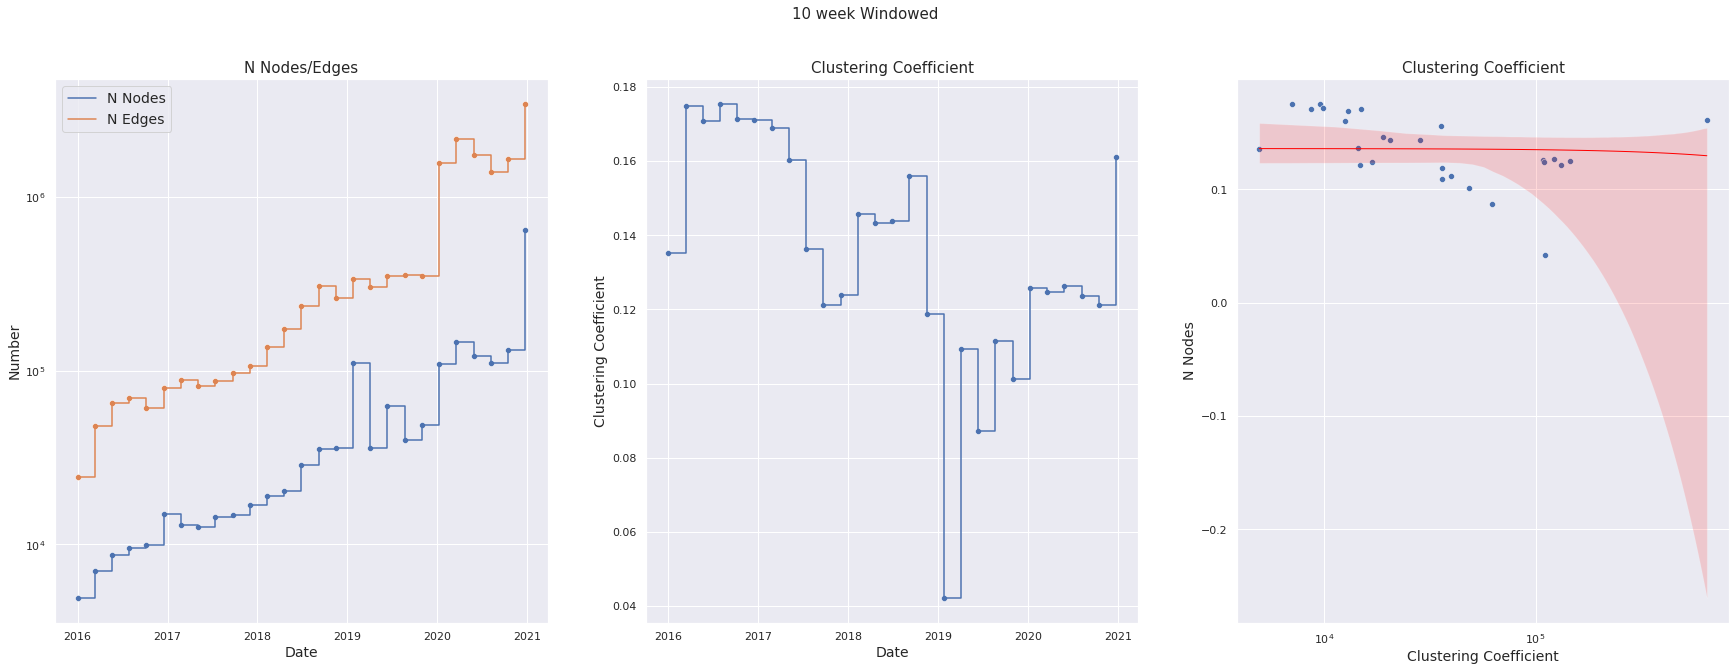

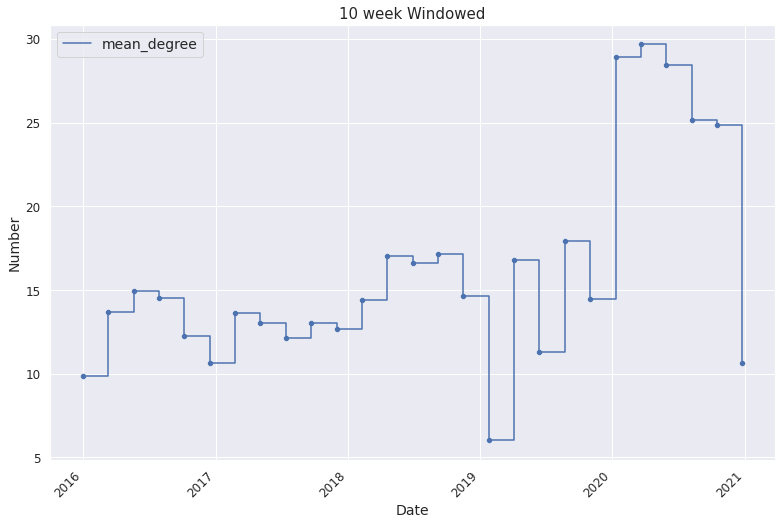

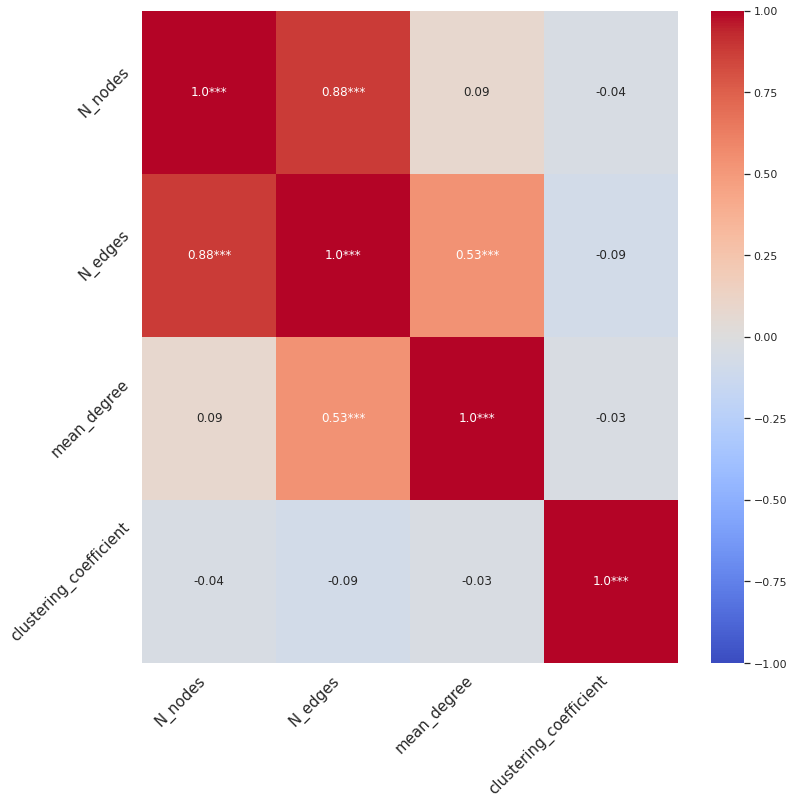

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('10 week Windowed', fontsize=15)

sns.lineplot(data=df_10_windowed['N_nodes'], label='N Nodes',drawstyle='steps-post',ax=ax[0])
sns.scatterplot(data=df_10_windowed['N_nodes'],ax=ax[0])
sns.lineplot(data=df_10_windowed['N_edges'], label='N Edges',drawstyle='steps-post',ax=ax[0])
sns.scatterplot(data=df_10_windowed['N_edges'],ax=ax[0])
ax[0].set_title('N Nodes/Edges', fontsize=15)
# ax[0].set_xticklabels(df_10_windowed.index.year, rotation=45, ha='right', fontsize=12)
ax[0].set_xlabel('Date', fontsize=14)
ax[0].set_ylabel('Number', fontsize=14)
ax[0].set_yscale('log')
ax[0].legend(fontsize=14)

sns.lineplot(data=df_10_windowed['clustering_coefficient'] ,drawstyle='steps-post',ax=ax[1])
sns.scatterplot(data=df_10_windowed['clustering_coefficient'],ax=ax[1])
ax[1].set_title('Clustering Coefficient', fontsize=15)
# ax[1].set_xticks(df_10_windowed.index.year, rotation=45, ha='right', fontsize=12)
ax[1].set_xlabel('Date', fontsize=14)
ax[1].set_ylabel('Clustering Coefficient', fontsize=14)

sns.scatterplot(x='N_nodes',y='clustering_coefficient',data=df_10_windowed,ax=ax[2])
sns.regplot(x='N_nodes',y='clustering_coefficient',data=df_10_windowed,ax=ax[2],scatter=False, color='red',line_kws={'linewidth':1})
ax[2].set_title('Clustering Coefficient', fontsize=15)
ax[2].set_xscale('log')
ax[2].set_xlabel('Clustering Coefficient', fontsize=14)
ax[2].set_ylabel('N Nodes', fontsize=14)

plt.show()

####

plt.figure(figsize=(13,8))
df_10_windowed.index = pd.to_datetime(df_10_windowed.index)
df_10_windowed.sort_index(inplace=True)

sns.lineplot(data=df_10_windowed['mean_degree'], label='mean_degree',drawstyle='steps-post')
sns.scatterplot(data=df_10_windowed['mean_degree'])

plt.title('10 week Windowed', fontsize=15)
# x axis size
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Date', fontsize=14)

plt.yticks(fontsize=12)
plt.ylabel('Number', fontsize=14)

plt.legend(fontsize=14)
plt.show()


####

rho = df_10_windowed.corr()
pval = df_10_windowed.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm')

# rotate xticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=15)
plt.show()

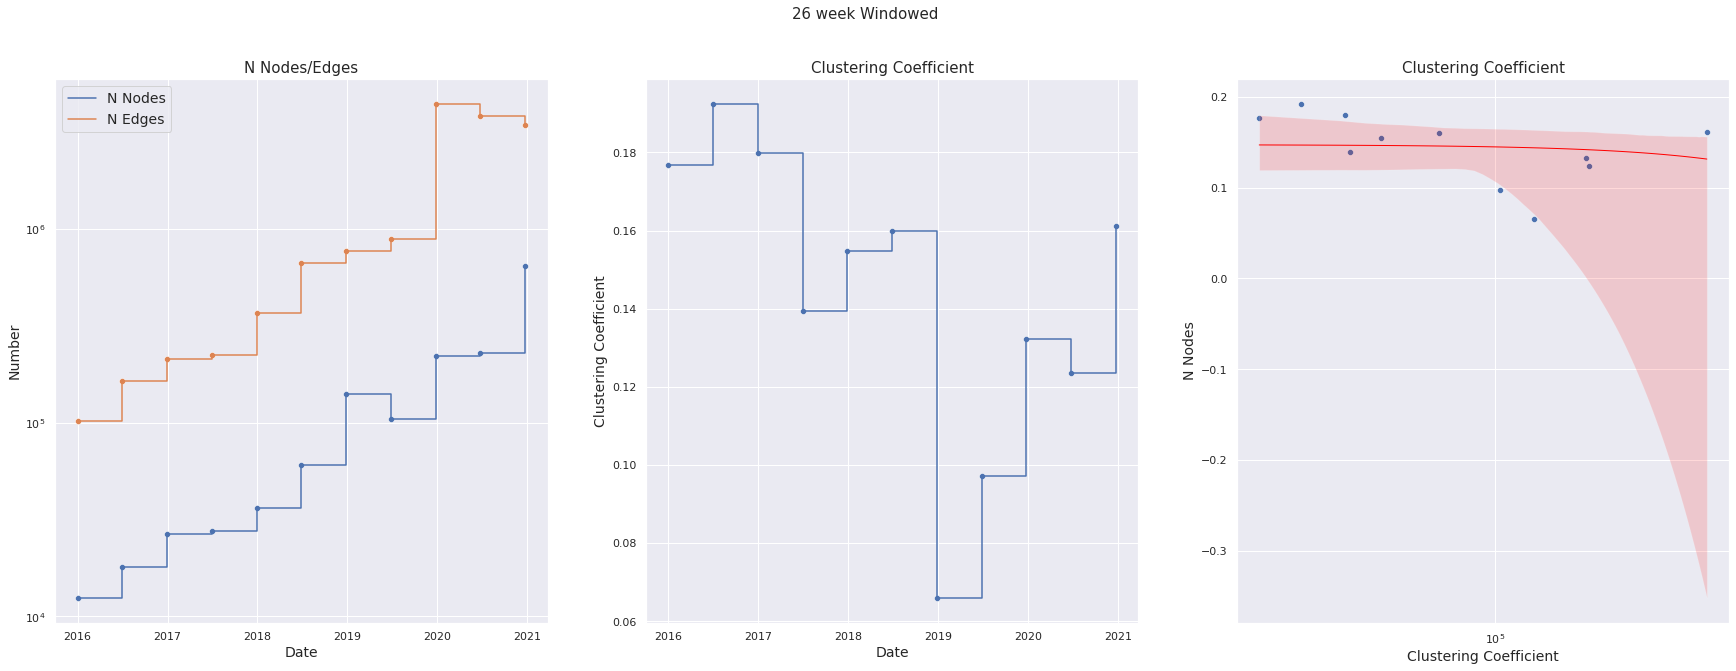

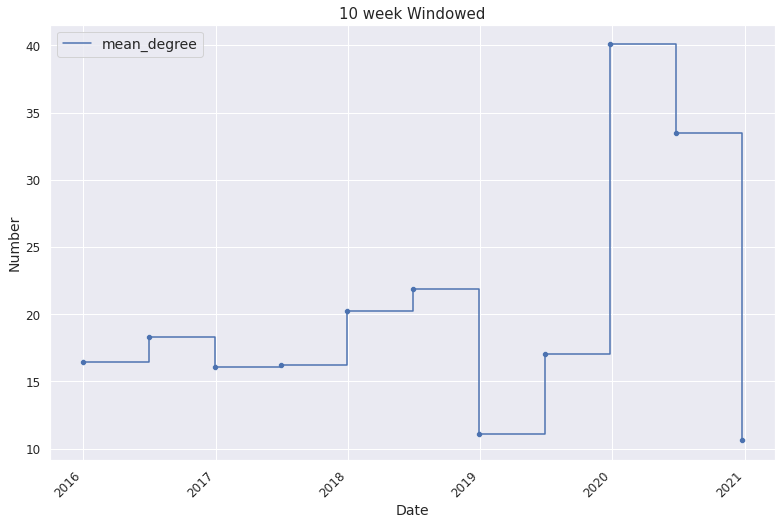

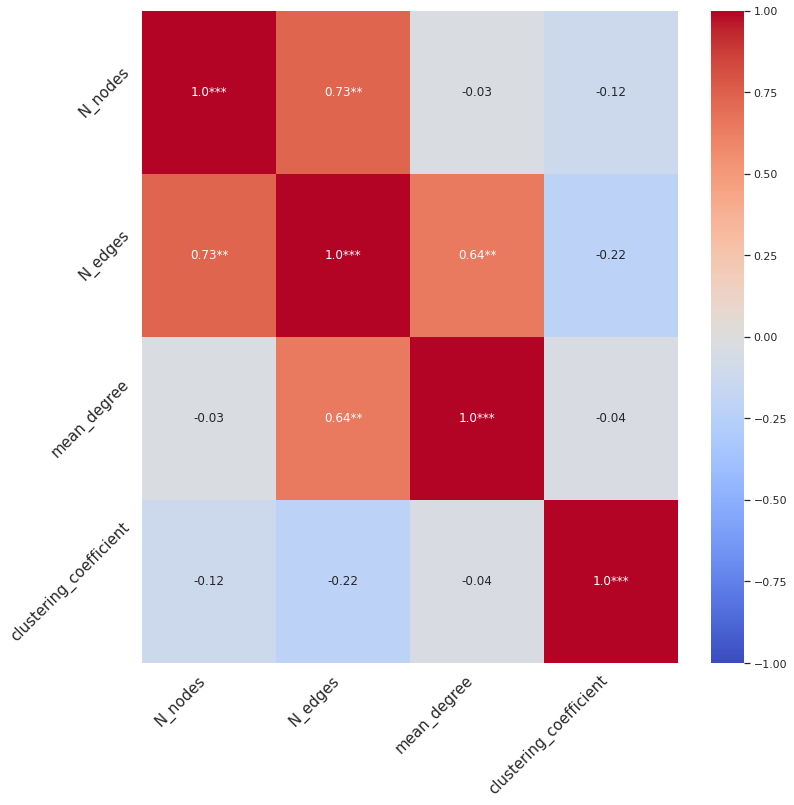

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('26 week Windowed', fontsize=15)

sns.lineplot(data=df_26_windowed['N_nodes'], label='N Nodes',drawstyle='steps-post',ax=ax[0])
sns.scatterplot(data=df_26_windowed['N_nodes'],ax=ax[0])
sns.lineplot(data=df_26_windowed['N_edges'], label='N Edges',drawstyle='steps-post',ax=ax[0])
sns.scatterplot(data=df_26_windowed['N_edges'],ax=ax[0])
ax[0].set_title('N Nodes/Edges', fontsize=15)
# ax[0].set_xticklabels(df_26_windowed.index.year, rotation=45, ha='right', fontsize=12)
ax[0].set_xlabel('Date', fontsize=14)
ax[0].set_ylabel('Number', fontsize=14)
ax[0].set_yscale('log')
ax[0].legend(fontsize=14)

sns.lineplot(data=df_26_windowed['clustering_coefficient'] ,drawstyle='steps-post',ax=ax[1])
sns.scatterplot(data=df_26_windowed['clustering_coefficient'],ax=ax[1])
ax[1].set_title('Clustering Coefficient', fontsize=15)
# ax[1].set_xticks(df_26_windowed.index.year, rotation=45, ha='right', fontsize=12)
ax[1].set_xlabel('Date', fontsize=14)
ax[1].set_ylabel('Clustering Coefficient', fontsize=14)

sns.scatterplot(x='N_nodes',y='clustering_coefficient',data=df_26_windowed,ax=ax[2])
sns.regplot(x='N_nodes',y='clustering_coefficient',data=df_26_windowed,ax=ax[2],scatter=False, color='red',line_kws={'linewidth':1})
ax[2].set_title('Clustering Coefficient', fontsize=15)
ax[2].set_xscale('log')
ax[2].set_xlabel('Clustering Coefficient', fontsize=14)
ax[2].set_ylabel('N Nodes', fontsize=14)

plt.show()

####

plt.figure(figsize=(13,8))
df_26_windowed.index = pd.to_datetime(df_26_windowed.index)
df_26_windowed.sort_index(inplace=True)

sns.lineplot(data=df_26_windowed['mean_degree'], label='mean_degree',drawstyle='steps-post')
sns.scatterplot(data=df_26_windowed['mean_degree'])

plt.title('10 week Windowed', fontsize=15)
# x axis size
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Date', fontsize=14)

plt.yticks(fontsize=12)
plt.ylabel('Number', fontsize=14)

plt.legend(fontsize=14)
plt.show()


####

rho = df_26_windowed.corr()
pval = df_26_windowed.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm')

# rotate xticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=15)
plt.show()

In [6]:
# fig, ax = plt.subplots(1, 3, figsize=(30, 10))
# fig.suptitle('26 week Windowed', fontsize=15)

# sns.lineplot(data=df_10['N_nodes'], label='N Nodes',drawstyle='steps-post',ax=ax[0])
# sns.scatterplot(data=df_10['N_nodes'],ax=ax[0])
# sns.lineplot(data=df_10['N_edges'], label='N Edges',drawstyle='steps-post',ax=ax[0])
# sns.scatterplot(data=df_10['N_edges'],ax=ax[0])
# ax[0].set_title('N Nodes/Edges', fontsize=15)
# # ax[0].set_xticklabels(df_10.index.year, rotation=45, ha='right', fontsize=12)
# ax[0].set_xlabel('Date', fontsize=14)
# ax[0].set_ylabel('Number', fontsize=14)
# ax[0].set_yscale('log')
# ax[0].legend(fontsize=14)

# sns.lineplot(data=df_10['clustering_coefficient'] ,drawstyle='steps-post',ax=ax[1])
# sns.scatterplot(data=df_10['clustering_coefficient'],ax=ax[1])
# ax[1].set_title('Clustering Coefficient', fontsize=15)
# # ax[1].set_xticks(df_10.index.year, rotation=45, ha='right', fontsize=12)
# ax[1].set_xlabel('Date', fontsize=14)
# ax[1].set_ylabel('Clustering Coefficient', fontsize=14)

# sns.scatterplot(x='N_nodes',y='clustering_coefficient',data=df_10,ax=ax[2])
# sns.regplot(x='N_nodes',y='clustering_coefficient',data=df_10,ax=ax[2],scatter=False, color='red',line_kws={'linewidth':1})
# ax[2].set_title('Clustering Coefficient', fontsize=15)
# ax[2].set_xscale('log')
# ax[2].set_xlabel('Clustering Coefficient', fontsize=14)
# ax[2].set_ylabel('N Nodes', fontsize=14)

# plt.show()

# ####

# plt.figure(figsize=(13,8))
# df_10.index = pd.to_datetime(df_10.index)
# df_10.sort_index(inplace=True)

# sns.lineplot(data=df_10['mean_degree'], label='mean_degree',drawstyle='steps-post')
# sns.scatterplot(data=df_10['mean_degree'])

# plt.title('26 week Windowed', fontsize=15)
# # x axis size
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.xlabel('Date', fontsize=14)

# plt.yticks(fontsize=12)
# plt.ylabel('Number', fontsize=14)

# plt.legend(fontsize=14)
# plt.show()


# ####

# rho = df_10.corr()
# pval = df_10.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
# p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))

# fig, ax = plt.subplots(figsize=(12,12))

# sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm')

# # rotate xticks
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=15)
# plt.show()

In [8]:
# plt.figure(figsize=(13,8))

# sns.lineplot(data=df_26_windowed['clustering_coefficient'], label='26 weeks windowed')
# sns.scatterplot(data=df_26_windowed['clustering_coefficient'])

# sns.lineplot(data=df_10_windowed['clustering_coefficient'],label='10 weeks windowed')
# sns.scatterplot(data=df_10_windowed['clustering_coefficient'])

# sns.lineplot(data=df_10['clustering_coefficient'],label='10 weeks')
# sns.scatterplot(data=df_10['clustering_coefficient'])


# plt.show()

In [9]:
# plt.figure(figsize=(13,8))

# sns.lineplot(data=df_26_windowed['N_nodes'], label='26 weeks windowed')
# sns.scatterplot(data=df_26_windowed['N_nodes'])

# sns.lineplot(data=df_10_windowed['N_nodes'],label='10 weeks windowed')
# sns.scatterplot(data=df_10_windowed['N_nodes'])

# sns.lineplot(data=df_10['N_nodes'],label='10 weeks')
# sns.scatterplot(data=df_10['N_nodes'])

# # log scale
# plt.yscale('log')


# plt.show()

In [29]:
score_files_10 = os.listdir('/home/pelle/Master_Thesis/data/processed/wallstreetbets_scores/graphs_10')

def get_before_date(file_name):
    return datetime.datetime.strptime(file_name[16:-4], '%Y-%m-%d')
    

files_date_dict = {}

for file in score_files_10:
    date = get_before_date(file)
    if date in files_date_dict:
        "Error: date already in dict"
    else:
        files_date_dict[date] = [file]

# sort dict by date

files_date_dict = {k: v for k, v in sorted(files_date_dict.items(), key=lambda item: item[0])}

In [75]:
sum_scores = []
deviation_scores = []
max_scores = []

for file in tqdm(files_date_dict.values()):

    t = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_scores/graphs_10/' + file[0])
    sum_scores.append(t.sum_score.mean())
    deviation_scores.append(t.sum_score.std())
    max_scores.append(t.sum_score.max())


100%|██████████| 25/25 [00:05<00:00,  4.62it/s]


In [82]:
scores_df = pd.DataFrame()

for file in tqdm(files_date_dict.values()):

    t = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_scores/graphs_10/' + file[0])
    t.set_index(['author','date'], inplace=True)
    scores_df = pd.concat([scores_df,t])

100%|██████████| 25/25 [00:41<00:00,  1.65s/it]


In [88]:
# get author zzzzzzzzzzzzazzz

scores_df.loc['zzzzzzzzzzzzazzz']

,sum_score,mean_score,activity,degree_centrality,betweenness_centrality,degree
date,,,,,,
2019-08-23,19.0,1.461538,NaN,NaN,NaN,NaN
2019-11-01,110.0,5.500000,NaN,NaN,NaN,NaN
2020-01-10,114.0,4.750000,NaN,NaN,NaN,NaN
2020-03-20,133.0,4.156250,NaN,NaN,NaN,NaN
2020-05-29,133.0,4.156250,NaN,NaN,NaN,NaN
2020-08-07,133.0,4.156250,NaN,NaN,NaN,NaN
2020-10-16,133.0,4.156250,NaN,NaN,NaN,NaN


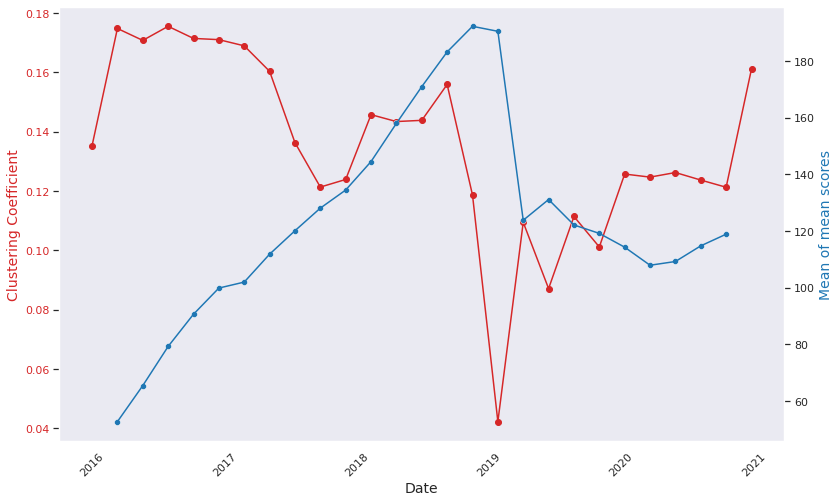

In [66]:
# multiple y axis
# seaborn theme no grid
sns.set_style("darkgrid", {'axes.grid' : False})

fig, ax1 = plt.subplots(figsize=(13,8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Clustering Coefficient', color=color, fontsize=14)

# ax1.plot(df_26_windowed.index, df_26_windowed['clustering_coefficient'], color=color)
# ax1.scatter(df_26_windowed.index, df_26_windowed['clustering_coefficient'], color=color)

ax1.plot(df_10_windowed.index, df_10_windowed['clustering_coefficient'], color=color)
ax1.scatter(df_10_windowed.index, df_10_windowed['clustering_coefficient'], color=color)



ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mean of mean scores', color=color, fontsize=14)  # we already handled the x-label with ax1
sns.scatterplot(x=list(files_date_dict.keys()),y=sum_scores, color=color, ax=ax2)
sns.lineplot(x=list(files_date_dict.keys()),y=sum_scores, color=color, ax=ax2)

plt.show()